# PART 1 - Machine Learning

## Task 1.1 - Data Preparation
There are 100 rows and 11 dimensions in the dataset. The data is 100% dense. Feature labels were added.

Task is to predict the number of containers a ship can carry. 
The target is known hence this is supervised learning.

From the inputs we want to get a output of the weighted sum : 𝑦 = 𝑓(𝑥𝑤)

- Import necessary modules and Read data and add feature names
- Call the head method to get a general overview of the data

In [37]:
#Import required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cols = ["IMO_NO.", "Vessel_Name", "Year_Built", "Gross_Tonnage", "Deadweight_Tonnage", "Length", "Beam", "Capacity_(TEU)", "Forward_Bays", "Center_Bays", "Aft_Bays"]
data = pd.read_csv('containers.csv',names=cols)
data.head()

,IMO_NO.,Vessel_Name,Year_Built,Gross_Tonnage,Deadweight_Tonnage,Length,Beam,Capacity_(TEU),Forward_Bays,Center_Bays,Aft_Bays
0,9260421,ANNA MAERSK,2003,93496,109000,352.60,42.80,8272,15,0,6
1,9461867,APL CHONGQING,2011,113735,122200,349.00,45.73,10106,15,0,5
2,9354404,BF EUPHORIA,2006,9962,11432,134.44,22.74,868,8,0,0
3,9343728,BREMEN EXPRESS,2008,93750,103567,335.06,42.87,8749,15,0,5
4,9314947,CAMELLIA,2006,28927,39200,222.15,30.04,2824,11,0,2


- **Explore the data**

Our first step is to summarize & explore the DataFrame by  computing aggregations. We can do this by using the info method in Pandas. We can see that all data is non-null as expected, and we have 8 numeric values, one target, and one String.

In [ ]:
data.info()
data.describe()

**Finding outliers and inconsistent data** 

For each of these features above, comparing the max and 75% values, we can start to see a huge difference in the Beam (Width) feature. This confirms that there may be an error with some of the tuples. 

**Duplicate Vessel Identification Number (IMO)**

Now lets count the vessel identification number, which should be unique for the given dataset, however we can easily spot a duplicate IMO vessel. An online search shows that this vessel was renamed/purchased, we will leave in this duplicate vessel. IMO No. 9314947 in the dataset.

Let us investigate further.

In [ ]:
print(data['IMO_NO.'].value_counts())

Let’s have a quick look at the distribution of the Beam feature by plotting the histograms.

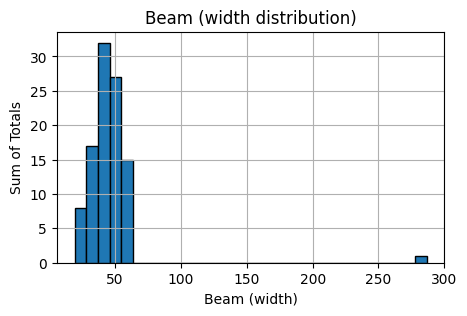

In [29]:

# for col in data.iloc[:,2:11]:
data['Beam'].hist(figsize=(5, 3), bins=30, edgecolor="black", )
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.title('Beam (width distribution)')
plt.xlabel('Beam (width)')
plt.ylabel("Sum of Totals")
plt.show()

**Fix the outlier, incorrect data**

Here we can see one ship has a length and width of 300x290 meters. I've never seen a square vessel before, probably doesn't go very fast!  The outlier is identified as MSC Albany with IMO 9619438. Correct beam should be 48meters. (https://www.vesselfinder.com/vessels/details/9619438) Since we have good reason to believe this is factually incorrect data it would be appropriate to correct the Beam to 48 meters

In [30]:
# Find the outlier as index 32, width cannot be the same as the length of the ship.
print(data.loc[32])

IMO_NO.                  9619438
Vessel_Name           MSC ALBANY
Year_Built                  2013
Gross_Tonnage              94017
Deadweight_Tonnage        112516
Length                    299.18
Beam                      286.67
Capacity_(TEU)              8886
Forward_Bays                  14
Center_Bays                    0
Aft_Bays                       4
Name: 32, dtype: object


- Clean the data

In [38]:
corrected_beam_MSC_Albany = 48
edited_data = data.copy()
edited_data.at[32,'Beam'] = corrected_beam_MSC_Albany
edited_data.loc[32]
edited_data

,IMO_NO.,Vessel_Name,Year_Built,Gross_Tonnage,Deadweight_Tonnage,Length,Beam,Capacity_(TEU),Forward_Bays,Center_Bays,Aft_Bays
0,9260421,ANNA MAERSK,2003,93496,109000,352.60,42.80,8272,15,0,6
1,9461867,APL CHONGQING,2011,113735,122200,349.00,45.73,10106,15,0,5
2,9354404,BF EUPHORIA,2006,9962,11432,134.44,22.74,868,8,0,0
3,9343728,BREMEN EXPRESS,2008,93750,103567,335.06,42.87,8749,15,0,5
4,9314947,CAMELLIA,2006,28927,39200,222.15,30.04,2824,11,0,2
...,...,...,...,...,...,...,...,...,...,...,...
95,9776418,CMA CGM ANTOINE DE SAINT EXUPERY,2018,217673,202684,400.00,59.00,20776,7,13,4
96,9863340,HMM HELSINKI,2020,228283,232606,399.90,61.00,23964,7,13,4
97,9868352,HMM STOCKHOLM,2020,232311,229039,399.90,61.50,23820,7,13,4
98,9778820,MILAN MAERSK,2017,214286,190326,399.00,58.60,20568,6,13,5


**Split the data (training & testing)**

- 75% Training data (Default)
- 25% Testing data (Default)
  A high traininset set of 75% will prevent overfitting*
  underfitting is too simple
- Shuffle the data

By default train_test_split method shuffles the Dataframe randomly prior to splitting, hence we do not need to shuffle beforehand. Shuffling the data ensures that there are no patterns or structure in the order of the data that could *bias the results* of the model. It also ensures that both the training and testing dataset contains a good generalization of the model and is representative of the overall distribution of the vessel data.

In [39]:
from sklearn.model_selection import train_test_split
X = edited_data.copy() # Copy prevents mutation of the original dataset incase we need to revert changes.
y = edited_data['Capacity_(TEU)'].copy() # Prevents mutation.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
X_Test_With_All_Columns = X_test.copy() # Keep a copy of the X_Test before dropping columns & Normalization below

# Log the number of training and testing data, you can see 75% for training,a nd 25% for testing.
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)



(75, 11) (25, 11) (75,) (25,)


Drop features that are not required to train the model, such as the target variable and the IMO_NO & Vessel_Name in order to lower dimension. 


In [40]:
cols_to_drop = ['IMO_NO.','Vessel_Name','Capacity_(TEU)']
X_train.drop(columns=cols_to_drop, axis=1, inplace=True) #Dropped cols
X_test.drop(columns=cols_to_drop, axis=1, inplace=True) #Dropped Cols

print(len(X_train)) # 75% Training data
print(len(X_test)) # 25% Testing data

75
25


**Feature Scaling using MinMaxScaler (Normalization)**

Now let us normalize the data to ensure that the values share a common scale, this will reduce complexity and optimize the data for machine learning. In this case we will use the StandardScaler

In [41]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_X_Train = scaler.fit_transform(X_train)
scaled_X_Test = scaler.fit_transform(X_test)


 Our data is now prepared for Modeling

## TASK 1.2 REGRESSION

**Pipelines**

We will be training our model on 3 regression algorithm's mentioned below. In order to efficiently load the models and evaluate each of them. We can use *make_pipeline from sklearn.pipeline*.

- Random Forest (Decision Trees)
- Multi Layer Perceptron  (MLP)
- Support Vector Regression

In [42]:
# Load the required dependencies
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

* Set up pipelines for each algorithm

In [44]:
from sklearn.pipeline import make_pipeline

# Store all the pipeline inside a dictionary.
pipelines = {
    'Random_Forest': make_pipeline(RandomForestRegressor(random_state=0)),
    'Multi_Layer_Perceptron' : make_pipeline(MLPRegressor(random_state=0)), # Early stopping prevents generalization, stops when predictions get worse
    'Support_Vector_Regression' : make_pipeline(SVR())
}

Each of the 3 algorithms contain tunable hyperparameters, instead of manually tuning parameter for our dataset, we can utilize sklearn GridSearchCV. 

GridSearchCV provides a exhaustive search *(2-10 mins depending on CPU power)* on our predefined parameters for each algorithm. This returns the best possible combination of hyperparameters for each of our 3 algorithms used.

In [60]:

#Set up a hyperparameter grid, the model will go through each of the parameters one by one in order to find the best convergence.

hyper_param_grid = {
    'Random_Forest': {
        'randomforestregressor__n_estimators':[50,100,200]
    },
    'Multi_Layer_Perceptron' : {
        'mlpregressor__hidden_layer_sizes':[50,100],
        'mlpregressor__solver':['adam','lbfgs'],
        'mlpregressor__max_iter':[100,500,2000]
    },
    'Support_Vector_Regression': {
        'svr__kernel':['sigmoid','linear','poly'],

    }    
}

Import Grid Search CV and run the pipelines to fit the models

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError 
import warnings #Import python warning package
from sklearn.exceptions import ConvergenceWarning # Disable Convergence Warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

fit_model = {} #Dictionary that holds our models

for algo,pipeline in pipelines.items():
    try:
        model = GridSearchCV(pipeline,hyper_param_grid[algo], verbose=4,cv=5) #Logging & Cross Validation, uses a scoring of r2 by default
        print('Training started for',algo,'...')
        model.fit(scaled_X_Train,y_train)
        fit_model[algo] = model

        print (algo, 'has been fitted! 👏')
        print ("========================================")
    except NotFittedError as e:
        print ("Error detected")
        print(repr(e))

print("All Training has been completed!! 👏👏")

Training started for Random_Forest ...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END randomforestregressor__n_estimators=50;, score=0.986 total time=   0.0s
[CV 2/5] END randomforestregressor__n_estimators=50;, score=0.985 total time=   0.0s
[CV 3/5] END randomforestregressor__n_estimators=50;, score=0.996 total time=   0.0s
[CV 4/5] END randomforestregressor__n_estimators=50;, score=0.985 total time=   0.0s
[CV 5/5] END randomforestregressor__n_estimators=50;, score=0.977 total time=   0.0s
[CV 1/5] END randomforestregressor__n_estimators=100;, score=0.987 total time=   0.0s
[CV 2/5] END randomforestregressor__n_estimators=100;, score=0.987 total time=   0.1s
[CV 3/5] END randomforestregressor__n_estimators=100;, score=0.996 total time=   0.0s
[CV 4/5] END randomforestregressor__n_estimators=100;, score=0.984 total time=   0.0s
[CV 5/5] END randomforestregressor__n_estimators=100;, score=0.981 total time=   0.0s
[CV 1/5] END randomforestregressor__n_estimato

**TOP 10 CONTAINERS ORDERED BY PREDICTED CAPACITY**

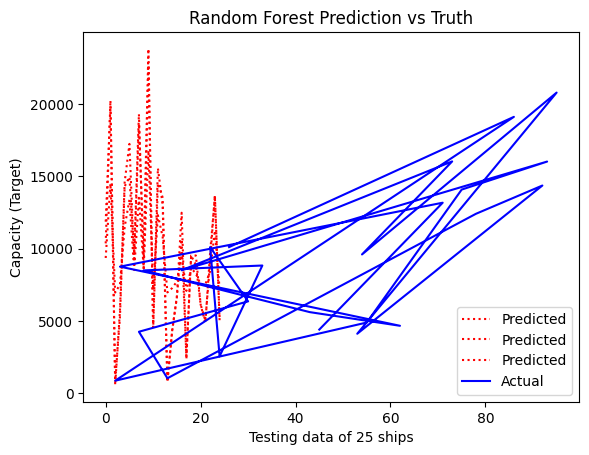

In [66]:
predictions = {}
Top10 = X_Test_With_All_Columns.loc[:,cols_to_drop]
for algo,pipeline in pipelines.items():
   predictions[algo] = fit_model[algo].predict(scaled_X_Test)
   Top10[algo] = predictions[algo]
   
   

In [ ]:
# plot the predicted test results as a red line


In [30]:
model.cv_results_

{'mean_fit_time': array([0.00099931, 0.00079799, 0.00119667, 0.00119672]),
 'std_fit_time': array([1.94848523e-05, 3.98993588e-04, 3.98731317e-04, 3.98826941e-04]),
 'mean_score_time': array([0.00078979, 0.00039887, 0.00059862, 0.00059862]),
 'std_score_time': array([0.00039518, 0.00048852, 0.00048877, 0.00048877]),
 'param_svr__kernel': masked_array(data=['rbf', 'sigmoid', 'linear', 'poly'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'svr__kernel': 'rbf'},
  {'svr__kernel': 'sigmoid'},
  {'svr__kernel': 'linear'},
  {'svr__kernel': 'poly'}],
 'split0_test_score': array([-0.12670587, -0.13129024, -0.12401844,  0.5155456 ]),
 'split1_test_score': array([-0.17710502, -0.18002451, -0.17288923,  0.35885791]),
 'split2_test_score': array([-0.01904871, -0.02320457, -0.01650559,  0.53849014]),
 'split3_test_score': array([-0.27836367, -0.28249319, -0.27529705,  0.43462284]),
 'split4_test_score': array([-0.16035009, -0.164

In [64]:
# Output the best scores for each Algorithm
print(fit_model['Random_Forest'].best_score_)
print(fit_model['Multi_Layer_Perceptron'].best_score_)
print(fit_model['Support_Vector_Regression'].best_score_)

# Output the best possible parameters for each Algorithm
print(fit_model['Random_Forest'].best_params_)
print(fit_model['Multi_Layer_Perceptron'].best_params_)
print(fit_model['Support_Vector_Regression'].best_params_)

# Print the best estimator
print("Best estimator:", fit_model['Random_Forest'].best_estimator_)
print("Best estimator:", fit_model['Multi_Layer_Perceptron'].best_estimator_)
print("Best estimator:", fit_model['Support_Vector_Regression'].best_estimator_)


0.9866910434783772
0.9902669495465763
0.4724182100296055
{'randomforestregressor__n_estimators': 100}
{'mlpregressor__hidden_layer_sizes': 50, 'mlpregressor__max_iter': 100, 'mlpregressor__solver': 'lbfgs'}
{'svr__kernel': 'poly'}
Best estimator: Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(random_state=0))])
Best estimator: Pipeline(steps=[('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=50, max_iter=100,
                              random_state=0, solver='lbfgs'))])
Best estimator: Pipeline(steps=[('svr', SVR(kernel='poly'))])


Create the 10 table for each Algorithm

In [50]:
# print(Top10.sort_values('Random_Forest', ascending=False).reset_index(drop=True).head(10))
RandomForestSet = Top10.drop(["Multi_Layer_Perceptron","Support_Vector_Regression"],axis=1).sort_values('Random_Forest', ascending=False).reset_index(drop=True).head(10)
MLPSet = Top10.drop(["Random_Forest","Support_Vector_Regression"],axis=1).sort_values('Multi_Layer_Perceptron', ascending=False).reset_index(drop=True).head(10)
SVR = Top10.drop(["Random_Forest","Multi_Layer_Perceptron"],axis=1).sort_values('Support_Vector_Regression', ascending=False).reset_index(drop=True).head(10)

### Top 10 Capacity Predictions using unseen Test Data for Random Forest Regression

In [52]:
# Random Forest Predicted Capacity
RandomForestSet

,IMO_NO.,Vessel_Name,Capacity_(TEU),Random_Forest
0,9776418,CMA CGM ANTOINE DE SAINT EXUPERY,20776,22667.72
1,9695121,CSCL GLOBE,19100,20231.30
2,9454436,CMA CGM MARCO POLO,16022,19292.04
3,9869186,HMM GARAM,16010,14938.07
4,9728942,TAURUS,14354,14513.29
5,9467263,CSCL JUPITER,14074,14295.53
6,9612997,ANTWERPEN EXPRESS,13167,13566.88
7,9467392,MSC BERYL,12400,13525.38
8,9739680,MAERSK GENOA,10100,10627.52
9,9685334,MOL BRILLIANCE,10100,10356.47


### Top 10 Capacity Predictions using unseen Test Data for Multi Layer Perceptron

In [53]:
# Multi Layer Perceptron Predicted Capacity
MLPSet

,IMO_NO.,Vessel_Name,Capacity_(TEU),Multi_Layer_Perceptron
0,9776418,CMA CGM ANTOINE DE SAINT EXUPERY,20776,23794.312823
1,9695121,CSCL GLOBE,19100,19851.550387
2,9454436,CMA CGM MARCO POLO,16022,18622.419128
3,9869186,HMM GARAM,16010,17231.349542
4,9728942,TAURUS,14354,15550.591314
5,9467263,CSCL JUPITER,14074,14608.975734
6,9612997,ANTWERPEN EXPRESS,13167,13713.749209
7,9467392,MSC BERYL,12400,13004.102935
8,9739680,MAERSK GENOA,10100,12473.898724
9,9685334,MOL BRILLIANCE,10100,11857.038051


### Top 10 Capacity Predictions using unseen Test Data for Support Vector Machines

In [54]:
# Support Vector Machine Capacity
SVR

,IMO_NO.,Vessel_Name,Capacity_(TEU),Support_Vector_Regression
0,9776418,CMA CGM ANTOINE DE SAINT EXUPERY,20776,16777.286346
1,9695121,CSCL GLOBE,19100,14486.176823
2,9454436,CMA CGM MARCO POLO,16022,13503.326428
3,9869186,HMM GARAM,16010,13377.521755
4,9728942,TAURUS,14354,12303.528355
5,9467263,CSCL JUPITER,14074,11491.232034
6,9612997,ANTWERPEN EXPRESS,13167,11243.513833
7,9467392,MSC BERYL,12400,10810.529471
8,9739680,MAERSK GENOA,10100,9556.156001
9,9685334,MOL BRILLIANCE,10100,9347.694540


### Task 1.3 Assessment of regression

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
# mae = {}
# for algo,model in fit_model.items():
#     mae[algo] = mean_squared_error(y_test,predictions[algo])
    # predictions[algo] = model.predict(X_test_Dropped)
    # print(f'{algo}| R2 = {r2_score(y_test, y_prediction)} | MAE = {mean_absolute_error(y_test,y_prediction)} | MSE = {mean_squared_error(y_test,y_prediction)}')
 
mae = mean_absolute_error(y_test,predictions['Random_Forest'])
mae
mae = mean_absolute_error(y_test,predictions['Multi_Layer_Perceptron'])
mae
mae = mean_absolute_error(y_test,predictions['Support_Vector_Regression'])
mae

# predictions['Random_Forest']

In [55]:
fit_model['Support_Vector_Regression'].
# model.best_estimator_/

SyntaxError: invalid syntax (1395061219.py, line 1)

Based on the GridSearch we know the best paramaters to use are :
{'randomforestregressor__n_estimators': 100}
{'mlpregressor__hidden_layer_sizes': 50, 'mlpregressor__max_iter': 100, 'mlpregressor__solver': 'lbfgs'}
{'svr__kernel': 'poly'}



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mlpregressor',
                                        MLPRegressor(random_state=0))]),
             param_grid={'mlpregressor__hidden_layer_sizes': [50, 100],
                         'mlpregressor__max_iter': [100, 500, 2000, 5000],
                         'mlpregressor__solver': ['adam', 'lbfgs']},
             verbose=4)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END mlpregressor__hidden_layer_sizes=50, mlpregressor__max_iter=100, mlpregressor__solver=adam;, score=-1.575 total time=   0.0s
[CV 2/5] END mlpregressor__hidden_layer_sizes=50, mlpregressor__max_iter=100, mlpregressor__solver=adam;, score=-6.729 total time=   0.0s
[CV 3/5] END mlpregressor__hidden_layer_sizes=50, mlpregressor__max_iter=100, mlpregressor__solver=adam;, score=-2.988 total time=   0.0s
[CV 4/5] END mlpregressor__hidden_layer_sizes=50, mlpregressor__max_iter=100, mlpregressor__solver=adam;, score=-3.318 total time=   0.0s

{'whiskers': [<matplotlib.lines.Line2D at 0x20a069a5480>,
 'caps': [<matplotlib.lines.Line2D at 0x20a069a59f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a069a5300>,
 'medians': [<matplotlib.lines.Line2D at 0x20a069a5f30>,
 'fliers': [<matplotlib.lines.Line2D at 0x20a069a61d0>,
 'means': []}

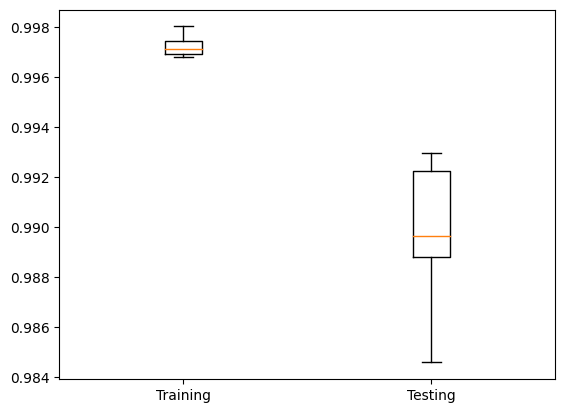

In [59]:
from sklearn.model_selection import cross_validate
rf_model = fit_model['Multi_Layer_Perceptron']
print(rf_model)

# cv_results = cross_validate(estimator=rf_model, X=X_train, y=y_train, cv=5, scoring='neg_mean_absolute_error',return_train_score=True)
cv_results = cross_validate(estimator=rf_model, X=scaled_X_Train, y=y_train, cv=5, return_train_score=True)
training = cv_results["train_score"]
testing = cv_results["test_score"]
plt.boxplot([training, testing], labels=['Training', 'Testing'])

In [97]:
#OR OROROR

DO I PASS IN SPLIT DATA OR ORIGINAL DATA?

print(X)
print(y)
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, X, y, cv=5, scoring='neg_mean_absolute_error',return_train_score=True)
training = cv_results["train_score"]
testing = cv_results["test_score"]
plt.boxplot([training, testing], labels=['Training', 'Testing'])

    IMO_NO.                       Vessel_Name  Year_Built  Gross_Tonnage   
0   9260421                       ANNA MAERSK        2003          93496  \
1   9461867                     APL CHONGQING        2011         113735   
2   9354404                       BF EUPHORIA        2006           9962   
3   9343728                    BREMEN EXPRESS        2008          93750   
4   9314947                          CAMELLIA        2006          28927   
..      ...                               ...         ...            ...   
95  9776418  CMA CGM ANTOINE DE SAINT EXUPERY        2018         217673   
96  9863340                      HMM HELSINKI        2020         228283   
97  9868352                     HMM STOCKHOLM        2020         232311   
98  9778820                      MILAN MAERSK        2017         214286   
99  9795610           COSCO SHIPPING UNIVERSE        2018         215553   

    Deadweight_Tonnage  Length   Beam  Capacity_(TEU)  Forward_Bays   
0               

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py", line 851, in evaluate_candidates
    _warn_or_raise_about_fit_failures(out, self.error_score)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 367, in _warn_or_raise_about_fit_failures
    raise ValueError(all_fits_failed_message)
ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py", line 192, in fit
    X, y = self._validate_data(
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'MSC BILBAO'

--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py", line 192, in fit
    X, y = self._validate_data(
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'EMMA MAERSK'


--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py", line 851, in evaluate_candidates
    _warn_or_raise_about_fit_failures(out, self.error_score)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 367, in _warn_or_raise_about_fit_failures
    raise ValueError(all_fits_failed_message)
ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py", line 192, in fit
    X, y = self._validate_data(
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'COSCO MALAYSIA'

--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py", line 192, in fit
    X, y = self._validate_data(
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'ANNA MAERSK'

